In [1]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data")
df

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


In [2]:
#lets provide column names to the dataframe
df.columns=["target","col1","col2","col3","col4"]
df

,target,col1,col2,col3,col4
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


In [3]:
#Lets check whether null values are present or not
df.isnull().sum()
#there are no null values

target    0
col1      0
col2      0
col3      0
col4      0
dtype: int64

In [4]:
#lets describe the dataframe
df.describe()

,col1,col2,col3,col4
count,624.000000,624.000000,624.000000,624.000000
mean,3.003205,3.003205,3.003205,3.003205
std,1.414210,1.414210,1.414210,1.414210
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [5]:
#lets chcek the correlation
df.corr()

,col1,col2,col3,col4
col1,1.000000,-0.003215,-0.003215,-0.003215
col2,-0.003215,1.000000,-0.003215,-0.003215
col3,-0.003215,-0.003215,1.000000,-0.003215
col4,-0.003215,-0.003215,-0.003215,1.000000


In [6]:
#lets chcek the skewness of the dataset
df.skew()
#there is no skewness at all

col1   -0.002266
col2   -0.002266
col3   -0.002266
col4   -0.002266
dtype: float64

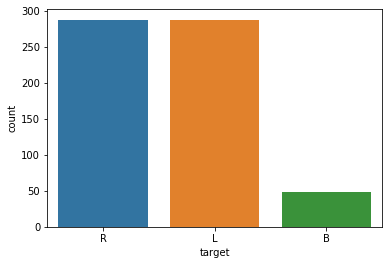

In [7]:
#Lets chcek the count of each type of target class
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="target",data=df)
plt.show()
#count of B type is very less
#L and R have equal counts

In [8]:
#lets divide input and output
df_x=df.drop(columns=["target"])
y=df[["target"]]

In [9]:
#let's bring the features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [10]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,

In [11]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [12]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    print("Mean roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").mean())
    print("standard deviation in roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").std())
    print(cross_val_score(model,x,y,cv=10,scoring="roc_auc"))

In [13]:
#lets chcek KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=10,scoring="roc_auc")
y1 = label_binarize(y, classes=[0, 1, 2])
clf.fit(x,y1)
clf.best_params_

{'n_neighbors': 25}

In [15]:
kc=KNeighborsClassifier(n_neighbors=25)
max_aucroc_score(kc,x,y1)

auc roc score corresponding to  42  is  0.7415127427994129
auc roc score corresponding to  43  is  0.7394636015325671
auc roc score corresponding to  44  is  0.7678799489144317
auc roc score corresponding to  45  is  0.7827934084367435
auc roc score corresponding to  46  is  0.6855711862145212
auc roc score corresponding to  47  is  0.7123911095861688
auc roc score corresponding to  48  is  0.7030389241531805
auc roc score corresponding to  49  is  0.7455967289986848
auc roc score corresponding to  50  is  0.7709131545338442
auc roc score corresponding to  51  is  0.7530069956729761
auc roc score corresponding to  52  is  0.7184575208249938
auc roc score corresponding to  53  is  0.7596452602885954
auc roc score corresponding to  54  is  0.8092273307790548
auc roc score corresponding to  55  is  0.7035845675835383
auc roc score corresponding to  56  is  0.7326656945159261
auc roc score corresponding to  57  is  0.729951773698557
auc roc score corresponding to  58  is  0.745277444196641

54

In [16]:
#Lets chcek the cross val score
#lets print the scores for KNN classifier
print("KNN CLASSIFIER\n\n")
model_evaluation(kc,x,y1)

KNN CLASSIFIER


Mean roc auc score for classifier:  0.9484103283225128
standard deviation in roc auc score for classifier:  0.03297595892283505
[0.96024653 0.91059607 0.95553981 0.95537764 0.98184101 0.96408046
 0.96516106 0.97701149 0.86629598 0.94795322]


In [17]:
#Lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y1)

auc roc score corresponding to  42  is  0.7631597758334762
auc roc score corresponding to  43  is  0.7615633518232592
auc roc score corresponding to  44  is  0.7880902003392997
auc roc score corresponding to  45  is  0.7485656011132079
auc roc score corresponding to  46  is  0.7780327290749319
auc roc score corresponding to  47  is  0.7187791883494405
auc roc score corresponding to  48  is  0.7567478698461715
auc roc score corresponding to  49  is  0.8331355673738586
auc roc score corresponding to  50  is  0.8054912220506661
auc roc score corresponding to  51  is  0.7789643735346257
auc roc score corresponding to  52  is  0.8447489563675873
auc roc score corresponding to  53  is  0.7335854253636035
auc roc score corresponding to  54  is  0.7407693334095805
auc roc score corresponding to  55  is  0.7620422790263243
auc roc score corresponding to  56  is  0.8124082651874726
auc roc score corresponding to  57  is  0.7605649911362726
auc roc score corresponding to  58  is  0.81738338956558

52

In [18]:
#lets use cross_val_score
#Lets print the scores of decision tree
print("Decision tree CLASSIFIER\n\n")
model_evaluation(dc,df_x,y1)

Decision tree CLASSIFIER


Mean roc auc score for classifier:  0.7310713427004643
standard deviation in roc auc score for classifier:  0.06053911700325642
[0.7751926  0.66299789 0.75210792 0.75237005 0.76285121 0.74498178
 0.74842437 0.76842028 0.76902657 0.57284076]


In [19]:
#Lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=10,scoring="roc_auc")
clf.fit(df_x,y1)
clf.best_params_

{'n_estimators': 500}

In [20]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y1)

auc roc score corresponding to  42  is  0.7646489773355446
auc roc score corresponding to  43  is  0.781957072873182
auc roc score corresponding to  44  is  0.8167186100150587
auc roc score corresponding to  45  is  0.7722188864108576
auc roc score corresponding to  46  is  0.7805727111568593
auc roc score corresponding to  47  is  0.7669768971235774
auc roc score corresponding to  48  is  0.7506671622729266
auc roc score corresponding to  49  is  0.7959913078286727
auc roc score corresponding to  50  is  0.8338527668172547
auc roc score corresponding to  51  is  0.7642629763062084
auc roc score corresponding to  52  is  0.8463453803778044
auc roc score corresponding to  53  is  0.7225963096395418
auc roc score corresponding to  54  is  0.73491498446465
auc roc score corresponding to  55  is  0.7709417472026839
auc roc score corresponding to  56  is  0.8338003469243819
auc roc score corresponding to  57  is  0.8688406625874459
auc roc score corresponding to  58  is  0.7774727893101542


92

In [21]:
#lets chcek the cross_val score
#Lets print the scores of Random forest
print("Random forest CLASSIFIER\n\n")
model_evaluation(rf_clf,df_x,y1)

Random forest CLASSIFIER


Mean roc auc score for classifier:  0.8714365091592917
standard deviation in roc auc score for classifier:  0.034524350243655924
[0.88089368 0.8311108  0.831103   0.83689387 0.835994   0.89565999
 0.87295752 0.90239648 0.91564826 0.94586145]


In [22]:
#we will use random forest as a final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 92,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf=RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
y_test = label_binarize(y_test, classes=[0, 1, 2])
y_pred = label_binarize(y_pred, classes=[0, 1, 2])
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[ 6  2  1]
 [ 7 49  2]
 [10  1 47]]
classification report 
               precision    recall  f1-score   support

           0       0.26      0.67      0.38         9
           1       0.94      0.84      0.89        58
           2       0.94      0.81      0.87        58

    accuracy                           0.82       125
   macro avg       0.71      0.77      0.71       125
weighted avg       0.89      0.82      0.84       125

AUC ROC Score:  0.8476225195859781
